In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandasgui import show

In [112]:
# Set file path
path = 'C:/Users/Jesson Pagaduan/Google Drive/regional_inequality/data/'

# Read NTL data
df_ntl_province = pd.read_excel(path + 'raw/ntl/ntl_province_clean.xlsx')

# Add a constant, 1, to  observations for which NTL=0
df_ntl_province.loc[df_ntl_province.ntl_sum == 0, 'ntl_sum'] = 1

# Read gridded population data
df_gpw_province = pd.read_excel(path + 'raw/population/gridded_population/extracted/scratch/gpw_province_clean.xlsx')

# Set index for join
df_ntl_province.set_index(['province', 'year'])
df_gpw_province.set_index(['province', 'year'])

# Join the two dataframes
df = df_ntl_province.set_index(['province', 'year']).join(df_gpw_province.set_index(['province', 'year']), rsuffix='_r')

# Keep relevant columns only
df.reset_index(inplace=True)
df = df[['province', 'province_id', 'region', 'region_id', 'country', 'year', 'type', 'ntl_sum', 'gpw_sum_ipo', 'gpw_sum_ipo_share']]

# Calculate NTL per capita: DAMN!!! THIS IS AMAZING DATASET: PROVINCE-LEVEL SERIES OF INCOME PER CAPITA
df = df.assign(ntl_pc = lambda x: x.ntl_sum / x.gpw_sum_ipo)

# Export to Excel
# df.to_excel('ntl_per_capita.xlsx', index=False)

In [113]:
df

,province,province_id,region,region_id,country,year,type,ntl_sum,gpw_sum_ipo,gpw_sum_ipo_share,ntl_pc
0,Abra,1,Cordillera Administrative Region (CAR),2,Philippines,2000,Province,1.000000,216018.138247,0.168736,0.000005
1,Abra,1,Cordillera Administrative Region (CAR),2,Philippines,2001,Province,3.893811,218808.153080,0.166021,0.000018
2,Abra,1,Cordillera Administrative Region (CAR),2,Philippines,2002,Province,9.965797,221598.167913,0.163457,0.000045
3,Abra,1,Cordillera Administrative Region (CAR),2,Philippines,2003,Province,10.234955,224388.182747,0.161031,0.000046
4,Abra,1,Cordillera Administrative Region (CAR),2,Philippines,2004,Province,8.846053,227178.197580,0.158734,0.000039
...,...,...,...,...,...,...,...,...,...,...,...
1838,Taguig City,4718,Metropolitan Manila,3,Philippines,2014,City,2068.934195,657149.873145,0.054849,0.003148
1839,Taguig City,4718,Metropolitan Manila,3,Philippines,2015,City,2298.928307,667120.511963,0.055239,0.003446
1840,Taguig City,4718,Metropolitan Manila,3,Philippines,2016,City,2430.425225,675642.186621,0.055621,0.003597
1841,Taguig City,4718,Metropolitan Manila,3,Philippines,2017,City,2535.384598,684163.861279,0.055998,0.003706


In [114]:
# Tabulate top 20 average income per capita
df.groupby(by='province').mean().sort_values(by='ntl_pc', ascending=False).head(50)

,province_id,region_id,year,ntl_sum,gpw_sum_ipo,gpw_sum_ipo_share,ntl_pc
province,,,,,,,
City of Makati,473,3,2009,4626.595614,5.721935e+05,0.050547,0.008263
Pasay City,4715,3,2009,2515.060440,3.381192e+05,0.029774,0.007471
Pateros,4716,3,2009,231.435218,3.095118e+04,0.002710,0.007382
City of Paranaque,4711,3,2009,3754.431271,5.942792e+05,0.051925,0.006442
City of San Juan,4713,3,2009,909.819305,1.423667e+05,0.012527,0.006410
City of Muntinlupa,479,3,2009,2447.284890,4.445429e+05,0.038994,0.005470
City of Pasig,4712,3,2009,3499.194003,6.797583e+05,0.059389,0.005159
City of Valenzuela,4714,3,2009,2812.775829,5.638115e+05,0.049468,0.005055
City of Mandaluyong,475,3,2009,1587.421125,3.269354e+05,0.028562,0.004953


In [115]:
# Tabulate bottom 20 average income per capita
df.groupby(by='province').mean().sort_values(by='ntl_pc', ascending=False).tail(50)

,province_id,region_id,year,ntl_sum,gpw_sum_ipo,gpw_sum_ipo_share,ntl_pc
province,,,,,,,
Bukidnon,16,14,2009,556.463892,1.285248e+06,0.312253,0.000383
Camarines Sur,20,10,2009,691.459908,1.758777e+06,0.342510,0.000363
Quirino,63,5,2009,72.421029,1.750862e+05,0.055248,0.000354
Quezon,62,7,2009,725.805111,1.909465e+06,0.155420,0.000350
Antique,6,11,2009,182.977065,4.994187e+05,0.073881,0.000331
Maguindanao,44,1,2009,350.405917,1.399227e+06,0.356545,0.000275
Davao Oriental,29,15,2009,150.845696,4.969172e+05,0.115784,0.000273
Isabela,37,5,2009,439.491670,1.463409e+06,0.463308,0.000270
Bohol,15,12,2009,320.628619,1.155830e+06,0.184719,0.000269


In [116]:
# Keep relevant columns only
df = df[['province', 'province_id', 'region', 'region_id', 'country', 'year', 'type', 'ntl_pc']]

# Get 2000 and 2018 values
df = df.groupby('province').last().join(df.groupby('province').first(), rsuffix='_r')[['province_id', 'region', 'region_id', 'country', 'type', 'ntl_pc', 'ntl_pc_r']]
df.columns = ['province_id', 'region', 'region_id', 'country', 'type', 'ntl_pc_2018', 'ntl_pc_2000']

# Calculate average long run growth
df = df.assign(long_run_growth = lambda x: (1 / 18) * (np.log(x.ntl_pc_2018 / x.ntl_pc_2000)), 
               log_ntl_pc_2018 = lambda x: np.log(x.ntl_pc_2018),
               log_ntl_pc_2000 = lambda x: np.log(x.ntl_pc_2000))
df.reset_index(inplace=True)

In [117]:
df

,province,province_id,region,region_id,country,type,ntl_pc_2018,ntl_pc_2000,long_run_growth,log_ntl_pc_2018,log_ntl_pc_2000
0,Abra,1,Cordillera Administrative Region (CAR),2,Philippines,Province,0.000231,0.000005,0.217282,-8.372038,-12.283118
1,Agusan del Norte,2,Region XIII (Caraga),17,Philippines,Province,0.001979,0.000305,0.103939,-6.225317,-8.096217
2,Agusan del Sur,3,Region XIII (Caraga),17,Philippines,Province,0.000463,0.000002,0.293778,-7.677812,-12.965813
3,Aklan,4,Region VI (Western Visayas),11,Philippines,Province,0.000776,0.000020,0.204420,-7.161508,-10.841064
4,Albay,5,Region V (Bicol Region),10,Philippines,Province,0.001041,0.000145,0.109678,-6.867690,-8.841894
...,...,...,...,...,...,...,...,...,...,...,...
92,Western Samar,66,Region VIII (Eastern Visayas),13,Philippines,Province,0.000343,0.000002,0.291215,-7.977260,-13.219134
93,Zambales,78,Region III (Central Luzon),6,Philippines,Province,0.002503,0.001188,0.041389,-5.990462,-6.735470
94,Zamboanga Sibugay,81,Region IX (Zamboanga Peninsula),9,Philippines,Province,0.000230,0.000036,0.102602,-8.379248,-10.226076
95,Zamboanga del Norte,79,Region IX (Zamboanga Peninsula),9,Philippines,Province,0.000353,0.000016,0.171267,-7.950124,-11.032931


<AxesSubplot:xlabel='ntl_pc_2018'>

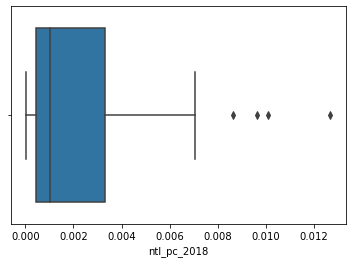

In [118]:
# Inspect outliers at the top part of income distribution
sns.boxplot(x='ntl_pc_2018', data=df)

In [119]:
df.sort_values('ntl_pc_2018', ascending=False).head(20)[['province', 'province_id', 'region', 'region_id', 'ntl_pc_2018']]

,province,province_id,region,region_id,ntl_pc_2018
27,City of Makati,473,Metropolitan Manila,3,0.012681
73,Pasay City,4715,Metropolitan Manila,3,0.010085
74,Pateros,4716,Metropolitan Manila,3,0.009653
36,City of San Juan,4713,Metropolitan Manila,3,0.008648
32,City of Muntinlupa,479,Metropolitan Manila,3,0.007068
9,Bataan,10,Region III (Central Luzon),6,0.006169
71,Pampanga,60,Region III (Central Luzon),6,0.005575
35,City of Pasig,4712,Metropolitan Manila,3,0.005560
34,City of Paranaque,4711,Metropolitan Manila,3,0.005420
52,Laguna,40,Region IV-A (Calabarzon),7,0.005113


<AxesSubplot:xlabel='ntl_pc_2000'>

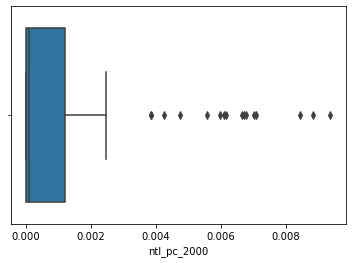

In [120]:
# Inspect outliers at the top part of income distribution
sns.boxplot(x='ntl_pc_2000', data=df)

In [121]:
df.sort_values('ntl_pc_2000', ascending=False).head(20)[['province', 'province_id', 'region', 'region_id', 'ntl_pc_2000']]

,province,province_id,region,region_id,ntl_pc_2000
37,City of Valenzuela,4714,Metropolitan Manila,3,0.009361
34,City of Paranaque,4711,Metropolitan Manila,3,0.008844
28,City of Malabon,474,Metropolitan Manila,3,0.008423
29,City of Mandaluyong,475,Metropolitan Manila,3,0.007066
73,Pasay City,4715,Metropolitan Manila,3,0.007013
27,City of Makati,473,Metropolitan Manila,3,0.006775
76,Quezon City,4717,Metropolitan Manila,3,0.006697
35,City of Pasig,4712,Metropolitan Manila,3,0.006650
26,City of Las Pinas,472,Metropolitan Manila,3,0.006149
30,City of Manila,476,Metropolitan Manila,3,0.006104


<AxesSubplot:xlabel='log_ntl_pc_2018'>

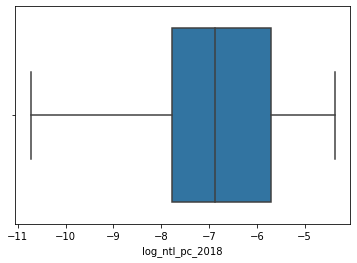

In [122]:
# Inspect outliers at the top part of income distribution
sns.boxplot(x='log_ntl_pc_2018', data=df)

<AxesSubplot:xlabel='log_ntl_pc_2000'>

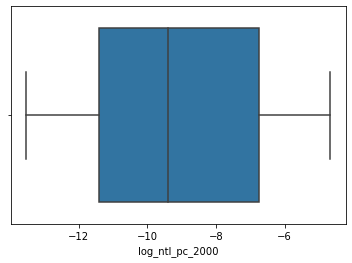

In [123]:
# Inspect outliers at the top part of income distribution
sns.boxplot(x='log_ntl_pc_2000', data=df)

<AxesSubplot:xlabel='long_run_growth'>

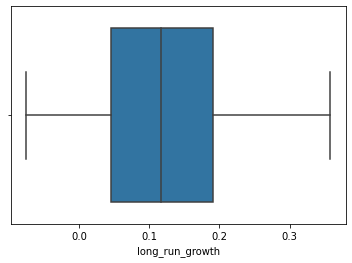

In [124]:
sns.boxplot(x='long_run_growth', data=df)

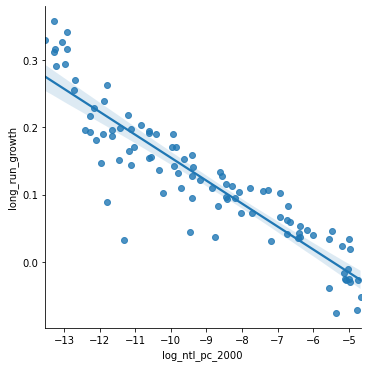

In [127]:
# Estimate beta convergence using linear regression
sns.lmplot(x='log_ntl_pc_2000', y='long_run_growth', data=df)

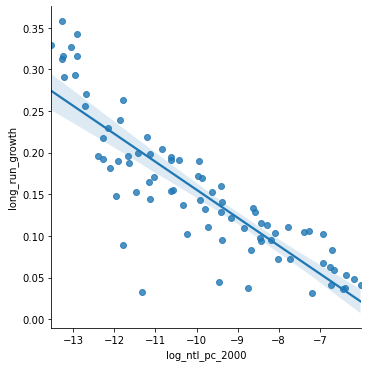

In [128]:
# Exclude Metro Manila as a robustness check
data = df.loc[df['region_id'] != 3]
sns.lmplot(x='log_ntl_pc_2000', y='long_run_growth', data=data)